In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import ttest_rel, ttest_ind
from scipy.stats.contingency import association
from scipy.stats import spearmanr, pearsonr
pd.set_option('display.max_columns', None)
from scipy.stats import f_oneway, norm, f, chi2, chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
scaler = MinMaxScaler()

In [2]:
df_cars=pd.read_csv('C:/Users/Usuario/Documents/Inhale-the-present-exhale-the-past.-/Data/Clean_data/Matriculaciones.csv', encoding= 'utf-8',sep=';')
df_budget_mad=pd.read_csv('C:/Users/Usuario/Documents/Inhale-the-present-exhale-the-past.-/Data\Clean_data/Presupuestos_madrid.csv', encoding='utf-8')
df_budget_sp=pd.read_csv('C:/Users/Usuario/Documents/Inhale-the-present-exhale-the-past.-/Data/Clean_data/Presupuestos.csv', encoding='latin1',sep=';')


In [3]:
df_cars.head(50)

,Año,Periodo,"Híbridos, eléctricos y otros",Gasolina,Diésel
0,2017,Septiembre,1.926,6.293,14.781
1,2017,Octubre,2.695,8.333,14.449
2,2017,Noviembre,2.302,10.753,16.235
3,2017,Diciembre,2.393,12.250,16.577
4,2018,Enero,2.889,15.930,16.304
5,2018,Febrero,2.710,21.476,17.262
6,2018,Marzo,2.826,27.137,19.351
7,2018,Abril,3.540,23.128,18.691
8,2018,Mayo,4.121,24.910,21.370
9,2018,Junio,6.030,25.872,23.864


In [4]:
df_kars=df_cars['Gasolina']+df_cars['Diésel']
df_kars2=df_cars['Gasolina']+df_cars['Diésel']+df_cars['Híbridos, eléctricos y otros']
df_kars = df_kars.to_frame()
df_kars2 = df_kars2.to_frame()

In [5]:
merged_df= df_kars.join(df_kars2, lsuffix='_kars', rsuffix='_kars2')
df_cars.columns

Index(['Año', 'Periodo', 'Híbridos, eléctricos y otros', 'Gasolina', 'Diésel'], dtype='object')

In [6]:
df_cars=df_cars.join(merged_df,lsuffix='df_cars')
df_cars = df_cars.rename(columns={'0_kars':'Total_combustion','0_kars2':'Total_Sold'})
df_cars.dropna()


,Año,Periodo,"Híbridos, eléctricos y otros",Gasolina,Diésel,Total_combustion,Total_Sold
0,2017,Septiembre,1.926,6.293,14.781,21.074,23.000
1,2017,Octubre,2.695,8.333,14.449,22.782,25.477
2,2017,Noviembre,2.302,10.753,16.235,26.988,29.290
3,2017,Diciembre,2.393,12.250,16.577,28.827,31.220
4,2018,Enero,2.889,15.930,16.304,32.234,35.123
...,...,...,...,...,...,...,...
61,2023,Septiembre,14.154,7.392,4.731,12.123,26.277
62,2023,Octubre,17.070,7.508,5.170,12.678,29.748
63,2023,Noviembre,17.430,8.739,4.831,13.570,31.000
64,2023,Diciembre,19.847,10.393,4.880,15.273,35.120


In [24]:
df_cars.Año.unique()

array(['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024',
       nan, 'Métrica:"Híbridos, eléctricos y otros"',
       'Fuente:"Anfac / Faconauto / Ganvam"', 'Clasificación:""',
       'Unidad:"Número de vehículos"', 'Escala:"Unidades"',
       'EscalaFactorPotencia10:"0"', 'SonDatosNumericos:"True"',
       'Métrica:"Gasolina"', 'Métrica:"Diésel"',
       'Url:"https://www.epdata.es/vehiculos-diesel-tuvieron-matriculaciones-gasolina-variaron-mientras-hibridos-electricos/09ab2c30-d71e-4608-98b2-e06c6e2673ed/madrid/304"',
       'Titulo:"En Comunidad de Madrid los vehículos diésel tuvieron un 4.375% de matriculaciones en enero de 2024 por un 16.107% de híbridos y eléctricos"',
       'Subtitulo:""'], dtype=object)

In [18]:
df_cars = df_cars.rename(columns={'0_kars':'Total_combustion','0_kars2':'Total_Sold'})
df_kars= df_cars.groupby('Año').agg({'Total_Sold':'value_counts'})
df_kars

Total_Sold
Año  Total_Sold            
2017 23.000               1
     25.477               1
     29.290               1
     31.220               1
2018 18.912               1
...                     ...
2023 36.158               1
     44.116               1
     48.320               1
     49.224               1
2024 29.163               1

[66 rows x 1 columns]

c:\Users\Usuario\anaconda3\Lib\site-packages\seaborn\algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))
c:\Users\Usuario\anaconda3\Lib\site-packages\numpy\lib\nanfunctions.py:1556: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


[]

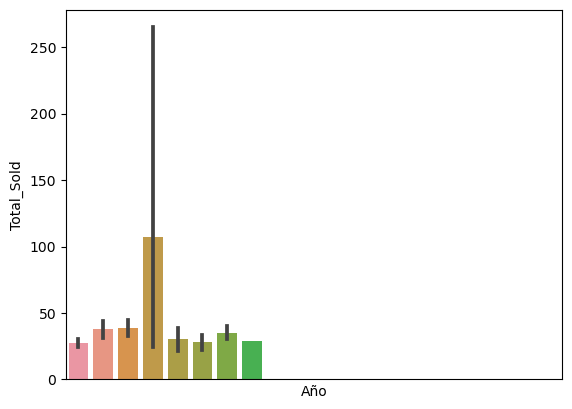

In [21]:
sns.barplot(x='Año', y='Total_Sold', data=df_cars)
plt.gca().set_xticks([])

df_kars=df_kars[df_kars['Total_Sold']==type(str)]
df_kars

In [45]:
df_cars['Año'] = df_cars['Año'].astype(str)
df_cars = df_cars[~df_cars['Año'].str.contains('a')]
df_cars = df_cars[~df_cars['Año'].str.contains('u')]
df_cars = df_cars[~(df_cars['Total_Sold'] == 969.500)]
df_cars.Año.unique()

array(['2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024'],
      dtype=object)

In [44]:
df_cars = df_cars[~(df_cars['Total_Sold'] == 969.500)]

<Axes: xlabel='Año', ylabel='Total_Sold'>

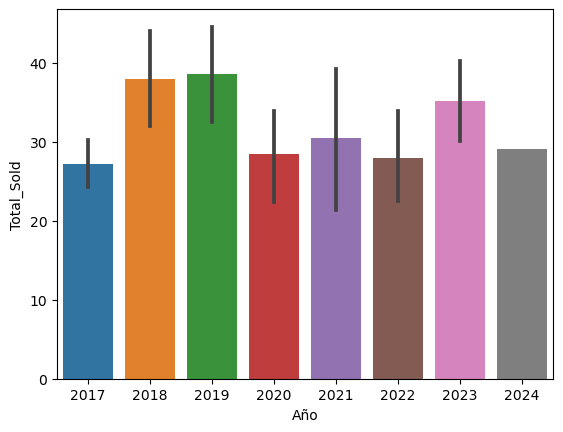

In [46]:
sns.barplot(x='Año', y='Total_Sold', data=df_cars)

In [36]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [37]:
df_cars.head(66)

,Año,Periodo,"Híbridos, eléctricos y otros",Gasolina,Diésel,Total_combustion,Total_Sold
0,2017,Septiembre,1.926,6.293,14.781,21.074,23.000
1,2017,Octubre,2.695,8.333,14.449,22.782,25.477
2,2017,Noviembre,2.302,10.753,16.235,26.988,29.290
3,2017,Diciembre,2.393,12.250,16.577,28.827,31.220
4,2018,Enero,2.889,15.930,16.304,32.234,35.123
5,2018,Febrero,2.710,21.476,17.262,38.738,41.448
6,2018,Marzo,2.826,27.137,19.351,46.488,49.314
7,2018,Abril,3.540,23.128,18.691,41.819,45.359
8,2018,Mayo,4.121,24.910,21.370,46.280,50.401
9,2018,Junio,6.030,25.872,23.864,49.736,55.766
